In [94]:
compare_emp = pd.read_csv(r"C:\Projects\MidMITS\NTEM\SHP\emp\landuse 2021 complete_02.csv")
compare_pop = pd.read_csv(r"C:\Projects\MidMITS\NTEM\SHP\pop\landuse 2021 complete_02.csv")

In [75]:
compare_emp

,msoa_zone_id,emp code,tfn_traveller_type,soc,2018,factor,2021
0,E02000001,E01,E01,1,236329.423500,1.016178,240152.859640
1,E02000001,E01,E01,2,216037.011200,1.016178,219532.148217
2,E02000001,E01,E01,3,109153.565300,1.016178,110919.497278
3,E02000001,E01,E01,4,16160.552950,1.016178,16422.005127
4,E02000001,E03,E03,1,203.703236,0.997600,203.214264
...,...,...,...,...,...,...,...
542715,W02000423,E13,E13,4,0.000000,0.971280,0.000000
542716,W02000423,E14,E14,1,2063.983316,1.004024,2072.288413
542717,W02000423,E14,E14,2,2452.085415,1.004024,2461.952165
542718,W02000423,E14,E14,3,2649.931269,1.004024,2660.594115


<AxesSubplot:xlabel='factor', ylabel='Density'>

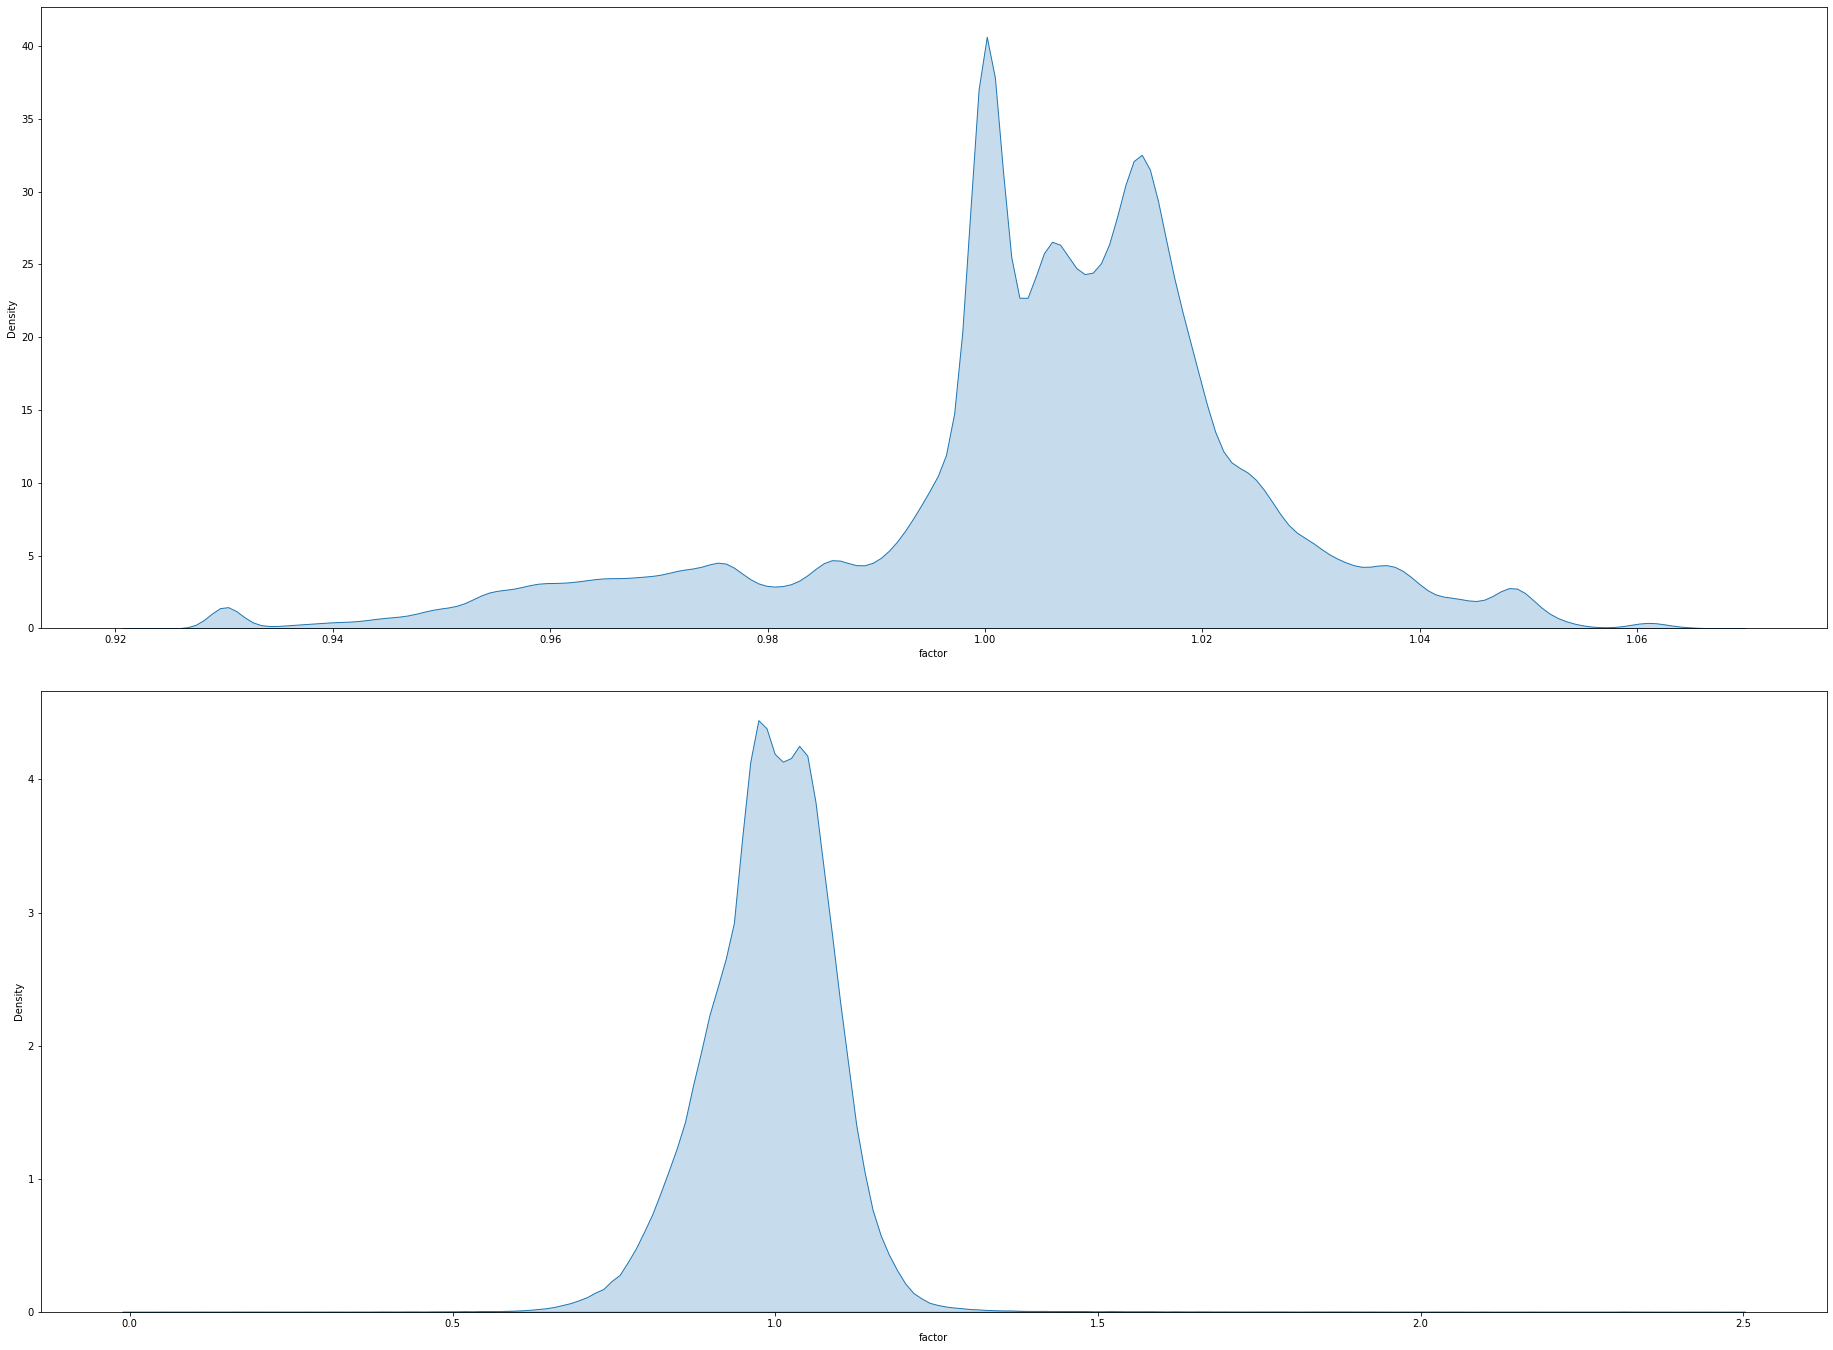

In [96]:
import seaborn as sns
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(32,24))
fig.subplots_adjust(hspace=0.1,wspace=0.1)
ax = fig.add_subplot(2, 1, 1)
sns.kdeplot(compare_emp['factor'],ax=ax,shade='fill')
ax = fig.add_subplot(2, 1, 2)
sns.kdeplot(compare_pop['factor'],ax=ax,shade='fill')
# ax = fig.add_subplot(2, 3, 3)
# sns.kdeplot(NTEM_pop_trav['pct'],ax=ax,shade='fill')
# ax = fig.add_subplot(2, 3, 4)
# sns.kdeplot(NTEM_emp_trav['pct'],ax=ax,shade='fill')
# ax = fig.add_subplot(2, 3, 5)
# sns.kdeplot(NTEM_pop['pct'],ax=ax,shade='fill')
# ax = fig.add_subplot(2, 3, 6)
# sns.kdeplot(NTEM_emp['pct'],ax=ax,shade='fill')

In [90]:
@dataclass
class growth_constants:
       base_path = r"C:\Projects\MidMITS\NTEM\SHP"
       lookup_pop = pd.read_excel(path.join(base_path,r"NTEM_land_use_growth_lookup.xlsx"),sheet_name="TfN Traveller Types",
       skiprows=11,usecols=['tfn_traveller_type','ntem_traveller_type']).set_index('tfn_traveller_type')
       lookup_emp = pd.read_excel(path.join(base_path,r"NTEM_land_use_growth_lookup.xlsx"),sheet_name="TfN Employment Types",
       skiprows=11,usecols=['employment_cat','NTEM_cat']).set_index('employment_cat')
       emp_2018 = pd.read_csv(path.join(base_path,r"land_use_2018_emp.csv")).set_index(['msoa_zone_id','employment_cat']).join(lookup_emp,how='inner').reset_index().set_index(['msoa_zone_id','employment_cat','NTEM_cat'])
       pop_2018 = pd.read_csv(path.join(base_path,r"land_use_2018_pop.csv")).set_index(['msoa_zone_id','tfn_traveller_type']).join(lookup_pop,how='inner').reset_index().set_index(['msoa_zone_id','tfn_traveller_type','ntem_traveller_type'])
       emp_2018.index.rename(['msoa_zone_id','employment_cat','emp code'])
       pop_2018.index.rename(['msoa_zone_id','tfn_traveller_type','pop code'])
       emp_2018.columns = ['soc','2018']
       pop_2018.columns = ['area type','2018']
       emp_growth = pd.read_csv(path.join(base_path,"emp",r"growth_pct_tfn.csv")).set_index('msoa_zone_id')
       pop_growth = pd.read_csv(path.join(base_path,"pop",r"growth_pct_tfn.csv")).set_index('msoa_zone_id') 
       dict = {"emp":[emp_2018,[ 'soc', '2018']],"pop":[pop_2018,['area type', '2018']]}
def apply_growth(df):
       df['factor'] = df['pct']
       df.loc[(df['2018']==0)&(df['2021']==0),'factor'] = 1
       df.loc[(df['2016']!=0)&(df['2021']!=0),'factor'] = df['growth']
       return df

In [92]:
c = growth_constants
type='pop'
df_16 = pd.read_csv(path.join(c.base_path,type,f"16_tfn.csv")).set_index('Unnamed: 0').stack().to_frame()
df_16.columns = ['2016']
df_18 = pd.read_csv(path.join(c.base_path,type,f"18_tfn.csv")).set_index('Unnamed: 0').stack().to_frame()
df_18.columns = ['2018']
df_21 = pd.read_csv(path.join(c.base_path,type,f"21_tfn.csv")).set_index('Unnamed: 0').stack().to_frame()
df_21.columns = ['2021']
df = df_16.join(df_18.join(df_21,how='inner'),how='inner')
df.index.rename(['msoa_zone_id',f'{type} code'],inplace=True)
df_trav = df.groupby(f'{type} code').sum()
df_trav['pct'] = df_trav['2021']/df_trav['2018']
df_final = df.join(df_trav['pct'],how='inner')
df_final['growth'] = df_final['2021']/df_final['2018']
growth_df = apply_growth(df_final).drop(['pct','growth'],axis=1)

In [79]:
growth_df = apply_growth(df_final).drop(['pct','growth'],axis=1)

In [100]:
compare_pop.set_index(['msoa_zone_id','pop code', 'tfn_traveller_type'],inplace=True)

In [102]:
compare_emp.set_index(['msoa_zone_id','emp code', 'tfn_traveller_type'],inplace=True)

In [103]:
emp = pd.read_csv(r"C:\Projects\MidMITS\NTEM\SHP\emp\compare_emp.csv").set_index('msoa_zone_id')
pop = pd.read_csv(r"C:\Projects\MidMITS\NTEM\SHP\pop\compare_pop.csv").set_index('msoa_zone_id')

In [107]:
emp.join(compare_emp.groupby('msoa_zone_id').sum(),how='inner').drop(['soc','factor'],axis=1).to_csv(r"C:\Projects\MidMITS\NTEM\SHP\emp\compare.csv")

In [109]:
pop.join(compare_pop.groupby('msoa_zone_id').sum(),how='inner').drop(['area type','factor'],axis=1).to_csv(r"C:\Projects\MidMITS\NTEM\SHP\pop\compare.csv")